In [1]:
import os
import pickle
import pandas as pd
import numpy as np

In [2]:
df_dir = '/om/user/ckauf/neural-nlp/ressources/scrambled-stimuli-dfs'
for filename in os.listdir(df_dir):
    print(filename)

stimuli_lowpmi_finalperiod.pkl
stimuli_every_other_word_random.pkl
stimuli_nouns_delete50percent.pkl
stimuli_Scr1.pkl
stimuli_lowPMI.pkl
stimuli_Scr3.pkl
stimuli_passageshuffle.pkl
stimuli_Scr7.pkl
investigate-pickle-files.ipynb
.ipynb_checkpoints
stimuli_random.pkl
stimuli_nopunctuation.pkl
stimuli_Scr5.pkl
stimuli_Original.pkl
stimuli_random_lowPMI.pkl
stimuli_nounsverbs.pkl
stimuli_backward.pkl
stimuli_functionwords.pkl
stimuli_randomnouns.pkl
stimuli_randomsentenceshuffle.pkl
stimuli_verbs.pkl
stimuli_contentwords.pkl
stimuli_nouns.pkl
stimuli_nounsverbsadj.pkl


In [3]:
with open(os.path.join(df_dir,"stimuli_Original.pkl"), "rb") as f:
    df = pickle.load(f)

orig_sentences = list(df["sentence"])
orig_sentences_l = [len(sent.split()) for sent in orig_sentences]
print(orig_sentences[:3])
print(orig_sentences_l[:3])

/om/user/ckauf/.conda/envs/brainmodeling/lib/python3.6/site-packages/brainio_base/assemblies.py:213: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


['beekeeping encourages the conservation of local habitats', "it is in every beekeeper's interest to conserve local plants that produce pollen", 'as a passive form of agriculture it does not require that native vegetation be cleared to make way for crops']
[7, 13, 20]


/om/user/ckauf/.conda/envs/brainmodeling/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/om/user/ckauf/.conda/envs/brainmodeling/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/om/user/ckauf/.conda/envs/brainmodeling/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/om/use

In [4]:
conditions = ["nouns","nounsverbs","nounsverbsadj","contentwords"] #"verbs" is 14% (also nounsverbs - nouns :P)
proportion_pos = []
for cond in conditions:
    fname = f"stimuli_{cond}.pkl"
    
    with open(os.path.join(df_dir,fname), "rb") as f:
        pos_df = pickle.load(f)
        pos_sentences = list(pos_df["sentence"])
    
    pos_sentences_l = [len(sent.split()) for sent in pos_sentences]
    curr_proportion = np.mean([pos_sentences_l[ind]/orig_sentences_l[ind] for ind in range(len(pos_sentences))])
    print(curr_proportion)
    proportion_pos.append(curr_proportion)
    

0.3620498876055707
0.5019628319574991
0.5917561498903063
0.6306157684336984


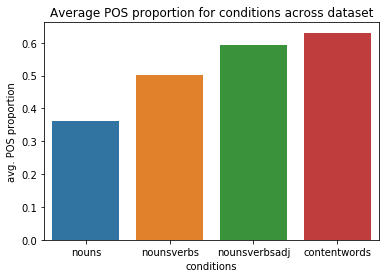

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = pd.DataFrame({
    "conditions" : conditions,
    "avg. POS proportion": proportion_pos
})
plt.title("Average POS proportion for conditions across dataset")
sns.barplot(x="conditions", y="avg. POS proportion", data=plot_df)
plt.show()